## Tarefa Aula V

Aplicação do algoritmo de aprendizado não supervisionado **K-MEANS**.
Para essa tarefa, foi desenvolvido a partir do código desenvolvido para a Aula II, que buscava uma introdução para RNA.

A partir do **K-MEANS**, podemos clusterizar nossa amostra. A clusterização consiste na divisão dos dados por agrupamentos a partir de um método não supervisionado. A clusterização facilita análises quantitativas e qualitativas de cada cluster.

Esse método é muito útil para nosso _dataset_ de automóveis, permitindo inclusive aprofundar o estudo inicial, que visava encontrar carros com desempenho interessante sem um investimento desproporcional.

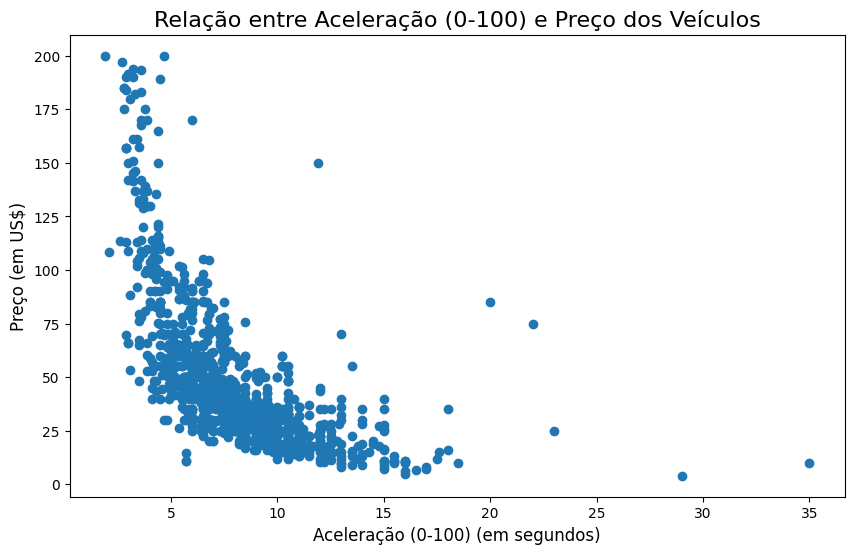

Erro Quadrático Médio (MSE): 358.05
Coeficiente de Determinação (R²): 0.60

Coeficientes do Modelo:
HorsePower: 0.22
Torque: -0.01
Acel_0-100: 0.22
Sugestão a: Preço previsto = $38.91
Sugestão b: Preço previsto = $22.00
Sugestão c: Preço previsto = $59.92
Sugestão d: Preço previsto = $34.76
Estatísticas por Faixa de Preço:
             HorsePower                   Torque             Acel_0-100  \
                   mean         std         mean         std       mean   
Price Range                                                               
0-25k        112.272300   32.346605   169.751174   63.127671  11.475587   
25k-50k      211.173913   69.031375   329.886128  114.254001   8.180538   
50k-75k      337.662037   83.430080   500.115741  148.654744   6.287500   
75k-100k     417.469880   93.980971   603.228916  158.767380   5.837349   
100k-150k    517.169492  130.092693   676.050847  198.864139   3.988136   
150k-200k    571.620690  133.875852   714.689655  193.972035   3.675862   


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1235732448.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_stats = df_limpo_modelo.groupby('Price Range')[['HorsePower', 'Torque', 'Acel_0-100']].agg(['mean', 'std'])


In [ ]:
# -*- coding: utf-8 -*-

#!pip install kagglehub --quiet
#!pip install seaborn --quiet
#!pip install matplotlib --quiet
import numpy as np
#import kagglehub
#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


# List files in the dataset directory
'''dataset_path = '/Cars Datasets 2025.csv'
if os.path.exists(dataset_path):
    print(os.listdir(dataset_path))
else:
    print(f"Dataset directory not found at {dataset_path}")
'''
# df = pd.read_csv("/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv",
# sep=',', header=0, encoding='latin-1', encoding_errors='ignore')

# Converter as colunas para tipo numérico
# A opção errors='coerce' transforma valores inválidos em NaN
# Demais opções de limpeza de dados

df = pd.read_csv("/Cars Datasets 2025.csv") #documento previamente limpo

# limpeza dos dados

df['HorsePower'] = df['HorsePower'].astype(str).str.replace(' hp', '', regex=False).str.split('-').str[0]
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')

df['Cars Prices'] = df['Cars Prices'].astype(str).str.replace('$', '', regex=False).str.replace(',', '.', regex=False).str.split('-').str[0]
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')

df['Torque'] = df['Torque'].astype(str).str.replace(' Nm', '', regex=False).str.split('-').str[0]
df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')

df['Acel_0-100'] = df['Acel_0-100'].astype(str).str.replace(' sec', '', regex=False).str.replace(',', '.', regex=False).str.split('–').str[0]
df['Acel_0-100'] = pd.to_numeric(df['Acel_0-100'], errors='coerce')

df_limpo = df.dropna(subset=['Acel_0-100', 'Cars Prices', 'HorsePower'])

# Remoção de Outliers
'''
Q1_price = df_limpo['Cars Prices'].quantile(0.25)
Q3_price = df_limpo['Cars Prices'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_hp = df_limpo['HorsePower'].quantile(0.25)
Q3_hp = df_limpo['HorsePower'].quantile(0.75)
IQR_hp = Q3_hp - Q1_hp

df_filtered = df_limpo[
    (df_limpo['Cars Prices'] >= (Q1_price - 1.5 * IQR_price)) & (df_limpo['Cars Prices'] <= (Q3_price + 1.5 * IQR_price)) &
    (df_limpo['HorsePower'] >= (Q1_hp - 1.5 * IQR_hp)) & (df_limpo['HorsePower'] <= (Q3_hp + 1.5 * IQR_hp))
]
'''

# Gráfico 1: Preço vs. Aceleração (0-100)
x_acel = np.array(df_limpo['Acel_0-100'])
y_preco = np.array(df_limpo['Cars Prices'])

plt.figure(figsize=(10, 6))
plt.scatter(x_acel, y_preco)

plt.title('Relação entre Aceleração (0-100) e Preço dos Veículos', fontsize=16)
plt.xlabel('Aceleração (0-100) (em segundos)', fontsize=12)
plt.ylabel('Preço (em US$)', fontsize=12)

plt.show()

#---------------------------------
#Início da parte de Machine-Learning

# Nova limpeza do DataFrame - Redundante mas boa prática para modelos mais robusto
df_limpo_modelo = df_limpo.dropna(subset=['HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices'])

# Variáveis de entrada (features), f(HP,Nm,0-100) = $
X = df_limpo_modelo[['HorsePower', 'Torque', 'Acel_0-100']]

# Variável de saída (target) , y=$
y = df_limpo_modelo['Cars Prices']

# modelo de aprendizado
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Cria uma instância do modelo
modelo = LinearRegression()

# Treina o modelo com os dados de treino
modelo.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Faz previsões com o modelo usando os dados de teste
previsoes = modelo.predict(X_test)

# Avalia o modelo usando métricas MSE e R2
mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Exibe os coeficientes do modelo para entender a importância de cada variável
print("\nCoeficientes do Modelo:")
for feature, coef in zip(X.columns, modelo.coef_):
    print(f"{feature}: {coef:.2f}")

# Combinações de parâmetros para prever o preço, seria um teste prático do modelo
# respectivamente 'HorsePower', 'Torque', 'Acel_0-100'
sugestoes = [[200, 28, 8], [120, 16, 9], [300, 50, 6.5], [180, 35, 9]]

# Realiza a previsão para cada combinação
previsoes_precos = modelo.predict(sugestoes)

# Exibe os resultados
for i, previsao in enumerate(previsoes_precos):
    print(f"Sugestão {chr(97+i)}: Preço previsto = ${previsao:.2f}")

# Estratificação dos dados

price_bins = [0, 25, 50, 75, 100, 150, 200, float('inf')]
price_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']

df_limpo_modelo['Price Range'] = pd.cut(df_limpo_modelo['Cars Prices'], bins=price_bins, labels=price_labels, right=False, include_lowest=True)

price_range_stats = df_limpo_modelo.groupby('Price Range')[['HorsePower', 'Torque', 'Acel_0-100']].agg(['mean', 'std'])

print("Estatísticas por Faixa de Preço:")
print(price_range_stats)

# Top 5 carros por estratificação de preço ($)
top_performers_by_price_range = {}

for price_range in price_labels:

    df_price_range = df_limpo_modelo[df_limpo_modelo['Price Range'] == price_range].sort_values(by='Acel_0-100', ascending=True)

    top_5_cars = df_price_range.head(5)[['Company Names', 'Cars Names', 'Acel_0-100', 'Fuel Types', 'HorsePower', 'Torque']]

    top_performers_by_price_range[price_range] = top_5_cars

print("\nTop 5 Carros com Menor Aceleração por Faixa de Preço:")
for price_range, top_cars in top_performers_by_price_range.items():
    print(f"\nFaixa de Preço: {price_range}")
    if top_cars.empty:
        print("Nenhum carro encontrado nesta faixa de preço.")
    else:
        print(top_cars)

# Etapa de Clusterização
Utilização do método não-supervisionado, quantitativo, k-means para clusterizar a amostra.

Geraçao de novo Data Frame

In [ ]:
df_clustering = df_limpo_modelo[['HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices']]
display(df_clustering.head())

,HorsePower,Torque,Acel_0-100,Cars Prices
0,37,51,29.0,4.0
1,65,100,16.0,5.0
2,70,140,16.0,6.2
3,70,140,16.5,6.5
4,70,140,17.0,7.0


## Determinação do número de Clusters
# Método do Cotovelo

  Ideia de que, ao aumentar o número de clusters (k), a "distorção" (ou inércia) total dentro de cada cluster tende a diminuir. A distorção é geralmente a soma das distâncias quadradas entre cada ponto e o centro do cluster.

  Então, para um número adequado de clusters, se usa a ideia de "cotovelo", em que graficamente, em certo k, a distorção tende a aumentar proporcionalmente menos. É utilizado então esse k pois lembra um "cotovelo"

# Médoto Silhouette

  Mede o quão bem cada ponto de dado está alinhado com o seu próprio cluster (coerência) e quão mal ele está alinhado com os clusters vizinhos (separação).




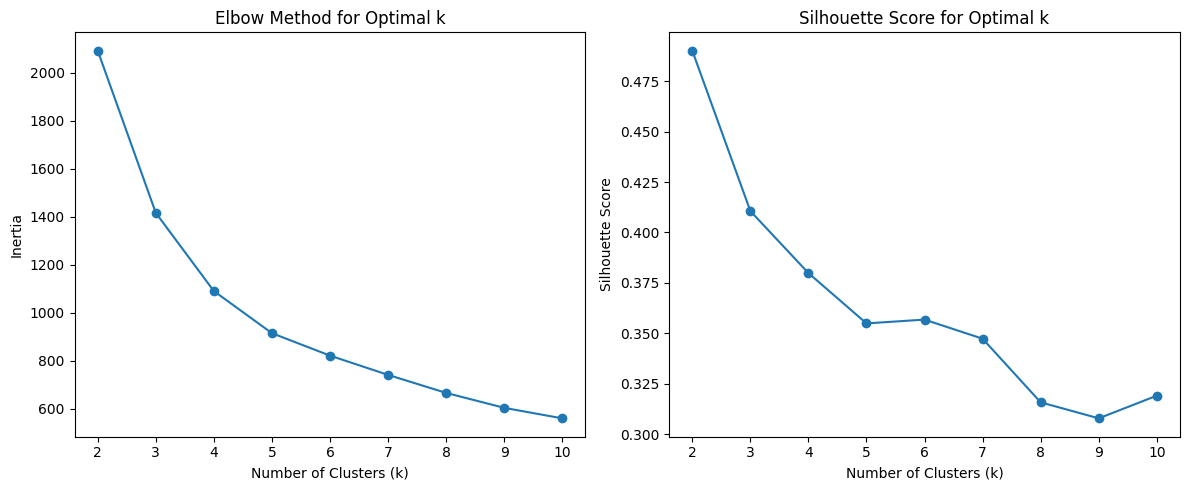

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Calculate inertia and silhouette scores
inertia_values = []
silhouette_scores = []
k_range = range(2, 11) # Start from 2 for silhouette score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## Aplicação do k-means

### Subtask:
Tendo um número de (k) definido anteriormente, se prossegue ao algoritmo.


In [ ]:
# Utilização do módulo KMeans do Sci-kit
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit KMeans
kmeans.fit(df_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df_limpo_modelo['Cluster'] = cluster_labels

# Display the first few rows with the new cluster column
display(df_limpo_modelo.head())

,Company Names,Cars Names,Engines,/Battery Capacity,HorsePower,Total Speed,Acel_0-100,Cars Prices,Fuel Types,Seats,Torque,Price Range,Cluster
0,Tata Motors,Nano GenX,624 MPFI,624,37,105,29.0,4.0,Petrol,4,51,0-25k,2
1,Tata Motors,Indica V2 Xeta,1.2L MPFI Petrol,1193,65,140,16.0,5.0,Petrol,5,100,0-25k,2
2,Tata Motors,Indica eV2,1.4L CR4 Diesel,1396,70,155,16.0,6.2,Diesel,5,140,0-25k,2
3,Tata Motors,Indigo eCS,1.4L CR4 Diesel,1396,70,155,16.5,6.5,Diesel,5,140,0-25k,2
4,Tata Motors,Indigo LX,1.4L CR4 Diesel,1396,70,150,17.0,7.0,Diesel,5,140,0-25k,2


# Visualização dos Clusters

Geração dos gráficos de dispersão, em que cada ponto (carro), está colorido com o cluster o qual se enquadra.

É possível gerar gráficos tendo nossa variável alvo (Preço dos Carros), em função da Potência (hp), Torque (Nm) e aceleração 0-100 km/h (s)



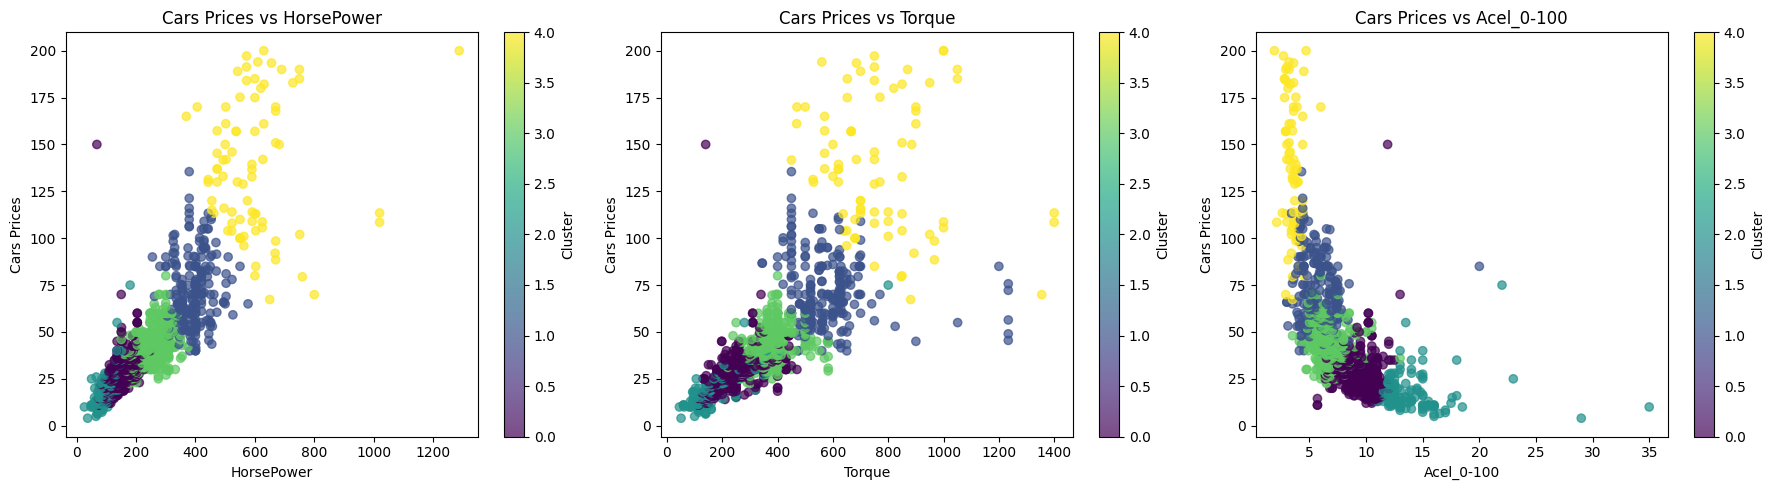

In [ ]:
features_to_plot = [('HorsePower', 'Cars Prices'), ('Torque', 'Cars Prices'), ('Acel_0-100', 'Cars Prices')]

plt.figure(figsize=(18, 5))

for i, (x_feature, y_feature) in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    scatter = plt.scatter(df_limpo_modelo[x_feature], df_limpo_modelo[y_feature], c=df_limpo_modelo['Cluster'], cmap='viridis', alpha=0.7)
    plt.title(f'{y_feature} vs {x_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    # Add a color bar for the clusters
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster')

plt.tight_layout()
plt.show()

## Resultados

### Informação de cada cluster:

Retorna as informações de cada cluster, obtendo as médias dos principais parâmetros. Essas informações ajudam a entender posteriormente a clusterização da amostra de veículos, embasando critérios qualitativos.


In [ ]:
cluster_characteristics = df_limpo_modelo.groupby('Cluster')[['HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices']].mean()
print("Cluster Characteristics (Mean Values):")
display(cluster_characteristics)

print("\nAnalysis of Clusters:")
# Analyze and summarize the characteristics based on the mean values
for index, row in cluster_characteristics.iterrows():
    print(f"\nCluster {index}:")
    print(f"  - Average HorsePower: {row['HorsePower']:.2f}")
    print(f"  - Average Torque: {row['Torque']:.2f}")
    print(f"  - Average Acceleration (0-100): {row['Acel_0-100']:.2f} seconds")
    print(f"  - Average Price: ${row['Cars Prices']:.2f}")


Cluster Characteristics (Mean Values):


,HorsePower,Torque,Acel_0-100,Cars Prices
Cluster,,,,
0,152.259053,242.228412,9.335655,28.192897
1,392.711111,581.297778,5.740889,72.005733
2,93.472727,166.100000,14.153636,18.202727
3,262.083601,381.877814,6.756270,43.722199
4,596.162500,767.637500,3.566250,137.427625



Analysis of Clusters:

Cluster 0:
  - Average HorsePower: 152.26
  - Average Torque: 242.23
  - Average Acceleration (0-100): 9.34 seconds
  - Average Price: $28.19

Cluster 1:
  - Average HorsePower: 392.71
  - Average Torque: 581.30
  - Average Acceleration (0-100): 5.74 seconds
  - Average Price: $72.01

Cluster 2:
  - Average HorsePower: 93.47
  - Average Torque: 166.10
  - Average Acceleration (0-100): 14.15 seconds
  - Average Price: $18.20

Cluster 3:
  - Average HorsePower: 262.08
  - Average Torque: 381.88
  - Average Acceleration (0-100): 6.76 seconds
  - Average Price: $43.72

Cluster 4:
  - Average HorsePower: 596.16
  - Average Torque: 767.64
  - Average Acceleration (0-100): 3.57 seconds
  - Average Price: $137.43


## Resumo:

### Análise Quantitativa

Cluster 0: Carros com desempenho e preços levemente acima da média - Podemos inferir SUVS Médios, Sedans Médios e Grandes - Motorização Turbo ou V6 a Gasolina.

Cluster 1: Carros e coupés de luxo, porém não em suas versões esportivas. Torque mais esparço e potência mais concentrada, comparando com o Cluster 4, pode sugerir presença de Picapes e Suvs Grandes;

Cluster 2: Carros com desempenho e motorização modesta. Pode-se inferir carros de entrada, hatches urbanos;

Cluster 3: Carros com desempenho e parâmetros muito interessantes pelo preço, com CxB mais atraente que o Cluster 2. Mantemos a mesma inferência que o Cluster 0.

Cluster 4: Nossos modelos de alto desempenho. Coupés e Esportivos.

### Próximos passos

* Explorar cada cluster de modo a ver os modelos mais ao centro de cada um, permitindo uma análise qualitativa com embasamento estatístico.

* Entender melhor o Cluster 3, por ter um melhor equilíbrio entre todos os parâmetros - possivelmente pode ser a nossa resposta inicial da motivação desse estudo - encontrar veículos com desempenho interessante e quais as principais similiaridades entre eles.

* Refazer os modelos preditivos a partir de cada cluster, de modo a aumentar o R² de 0,6.

**Representação de Cada Cluster - Modelos Característicos**:
Cálculo da distância de cada carro até o centroide do cluster, permitindo classificar os dados por distância, dentro de cada cluster, e selecionar os 10 carros mais próximos.

In [ ]:
from scipy.spatial.distance import cdist

# The scaled data used for KMeans training includes 'HorsePower', 'Torque', 'Acel_0-100', and 'Cars Prices'
# Recalculate scaled data to ensure consistency with the clustering step
scaler = StandardScaler()
df_scaled_for_distance = scaler.fit_transform(df_limpo_modelo[['HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices']])


# Calculate distance to cluster centroids for the scaled data
# Use the same columns as used for KMeans training
distances = cdist(df_scaled_for_distance, kmeans.cluster_centers_, 'euclidean')

# Initialize a dictionary to store the top 10 cars per cluster
top_10_central_cars = {}

# Iterate through each cluster to find the top 10 closest cars
for cluster_id in range(kmeans.n_clusters):
    # Create a boolean mask for the current cluster
    cluster_mask = (df_limpo_modelo['Cluster'] == cluster_id)

    # Select the distances for the current cluster using the mask
    distances_for_cluster = distances[cluster_mask, cluster_id]

    # Get the index of the data points in the current cluster
    cluster_index = df_limpo_modelo.index[cluster_mask]

    # Add distances to the original dataframe for sorting
    df_limpo_modelo.loc[cluster_index, 'Distance_to_Centroid'] = distances_for_cluster

    # Sort by distance to centroid and select the top cars
    sorted_cars = df_limpo_modelo[cluster_mask].sort_values(by='Distance_to_Centroid')

    # Select the top 10 unique companies
    top_cars = sorted_cars.drop_duplicates(subset=['Company Names']).head(10)


    # Store the top 10 cars for the current cluster
    top_10_central_cars[cluster_id] = top_cars[['Company Names', 'Cars Names', 'HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices', 'Fuel Types']]

# Display the top 10 central cars per Cluster (Unique Companies)
print("Top 10 Central Cars per Cluster (Unique Companies):")
for cluster_id, cars in top_10_central_cars.items():
    print(f"\nCluster {cluster_id}:")
    display(cars)

# Remove the temporary 'Distance_to_Centroid' column
df_limpo_modelo = df_limpo_modelo.drop(columns=['Distance_to_Centroid'])

Top 10 Central Cars per Cluster (Unique Companies):

Cluster 0:


,Company Names,Cars Names,HorsePower,Torque,Acel_0-100,Cars Prices,Fuel Types
203,Chevrolet,Trailblazer,155,236,9.4,23.1,Petrol
225,Tata Motors,Nexon EV Max,143,250,9.0,25.0,Electric
369,Mitsubishi,Eclipse Cross Black Edition,152,250,9.8,30.0,Petrol
305,Peugeot,208 Allure Premium,130,230,9.5,28.0,Petrol
376,Volkswagen,Golf Sportsvan,140,250,8.9,30.0,Petrol
254,Nissan,Qashqai,156,260,8.9,26.0,Petrol
318,GMC,Terrain Elevation Edition,170,275,9.3,28.7,Petrol
255,Mazda,Mazda3,155,213,8.9,26.0,Petrol
435,BMW,118i XDRIVE,136,250,8.9,34.0,Petrol
187,TOYOTA,COROLLA,139,200,9.4,22.5,Petrol/Hybrid



Cluster 1:


,Company Names,Cars Names,HorsePower,Torque,Acel_0-100,Cars Prices,Fuel Types
896,Ford,Bronco Raptor,400,583,5.5,70.000,Petrol
899,Nissan,Ariya Dual Motor AWD,389,600,5.1,70.000,Electric
928,GMC,Yukon Denali Performance,420,624,6.0,76.805,Petrol
909,MERCEDES,BENZ GLE 53,429,620,5.2,71.000,Petrol
920,Jaguar Land Rover,Jaguar F-PACE P400e Plug-in Hybrid,398,640,5.1,75.000,Plug-in Hybrid
885,AUDI,A7,335,600,5.7,68.000,Petrol
927,Chevrolet,Tahoe High Country,420,624,6.7,76.700,Petrol
921,Porsche,Macan S,375,520,4.8,75.000,Petrol
813,Jeep,Grand Cherokee 4xe,375,637,6.0,59.865,Hybrid
935,Cadillac,Escalade,420,624,6.8,79.295,Petrol



Cluster 2:


,Company Names,Cars Names,HorsePower,Torque,Acel_0-100,Cars Prices,Fuel Types
135,Mazda,Bongo Van,100,140,14.0,19.0,Petrol/Diesel
113,Nissan,Violet,85,130,13.8,18.0,Petrol
9,Tata Motors,Manza,90,160,14.0,9.0,Diesel/Petrol
194,Mitsubishi,Xpander,105,141,13.5,22.5,Petrol
155,Volkswagen,Volkswagen Lupo 3L,61,140,14.5,20.0,Diesel
115,TOYOTA,AYGO X,71,93,14.8,18.0,Petrol
37,HYUNDAI,I10,87,120,12.2,12.4,Petrol
30,MARUTI SUZUKI,DZIRE,83,113,12.2,11.4,Petrol/Diesel
195,Peugeot,Partner,75,200,12.0,22.5,Diesel
278,BMW,114D,95,270,12.2,27.0,Diesel



Cluster 3:


,Company Names,Cars Names,HorsePower,Torque,Acel_0-100,Cars Prices,Fuel Types
643,Acura,RDX Turbo AWD,272,400,6.6,45.000,Petrol
650,Jaguar Land Rover,Jaguar XE,250,365,6.5,45.000,Petrol
598,Jeep,Wrangler Rubicon,270,400,7.1,42.100,Petrol
575,HYUNDAI,Santa Cruz,281,400,6.5,40.799,Petrol
718,Nissan,Infiniti QX55*,268,380,6.5,50.000,Petrol
534,AUDI,A4,248,400,6.5,39.000,Petrol
555,KIA,SPORTAGE 2024(SX TURBO AWD),240,400,6.5,40.000,Petrol/AWD
593,BMW,128ti,261,400,6.1,42.000,Petrol
591,Kia,Sorento X-Line,277,421,7.0,42.000,Petrol
578,Cadillac,CT5 Premium Luxury,237,350,6.8,41.290,Petrol



Cluster 4:


,Company Names,Cars Names,HorsePower,Torque,Acel_0-100,Cars Prices,Fuel Types
1054,BMW,M5 CS,627,750,3.0,142.00,Petrol
1041,Porsche,Panamera 4S E-Hybrid Executive,560,750,3.7,128.90,Hybrid
1038,Jaguar Land Rover,Jaguar F-Type SVR,575,700,3.7,120.00,Petrol
1033,AUDI,RS7 SPORTBACK,591,800,3.6,114.00,Petrol
1055,ASTON MARTIN,VANTAGE,503,685,3.6,142.00,Petrol
1062,Acura,NSX Type S,600,666,2.9,157.00,Hybrid
1027,MERCEDES,BENZ GLE 63 S,603,850,4.2,113.00,Petrol
1058,Cadillac,Escalade V,682,885,4.4,149.99,Petrol
1028,NISSAN,GT-R,600,637,2.9,113.00,Petrol
1073,Nissan,GT-R V-Spec,600,652,2.8,175.00,Petrol


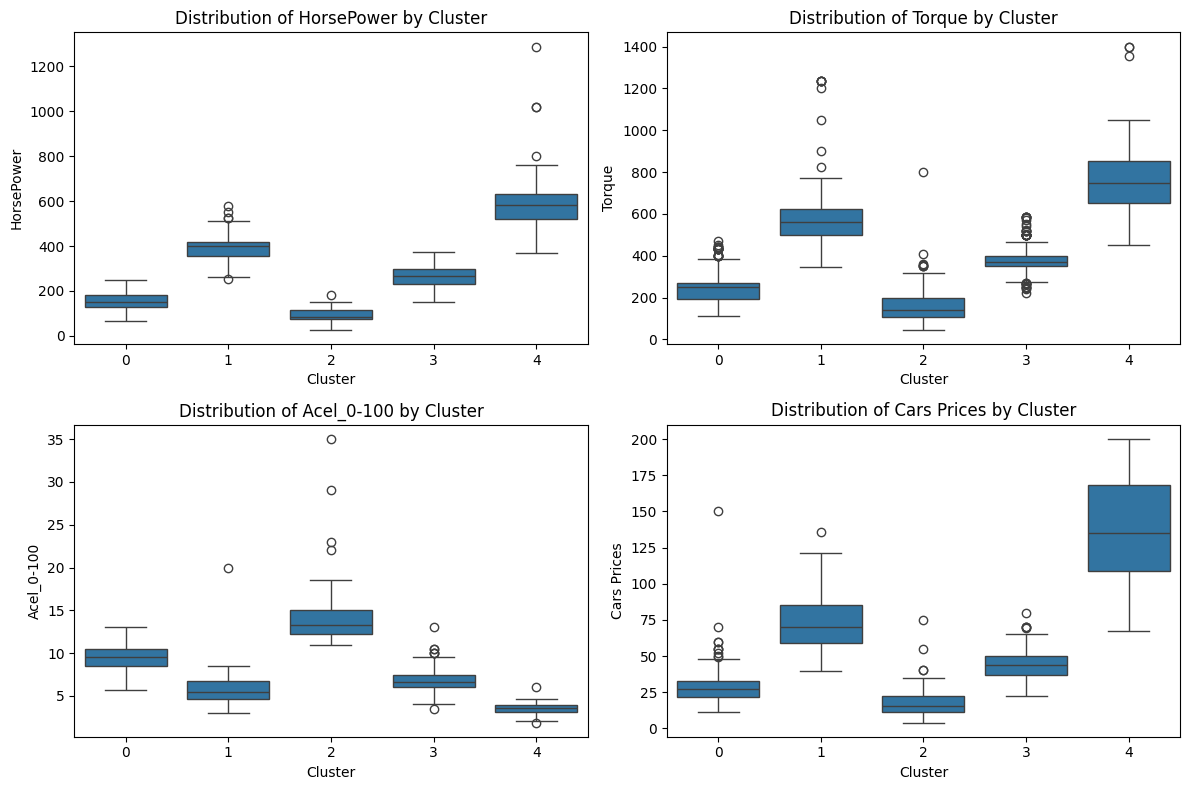

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['HorsePower', 'Torque', 'Acel_0-100', 'Cars Prices']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df_limpo_modelo)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Resultados Qualitativos

Cluster 0: Um perfil de carros com potência e torque moderados, aceleração razoável e preço médio. Carros como o Mazda 3, Corolla e BMW Serie 1. Carros de uso geral, com bom equilíbrio desempenho e preço - **geralmente opções de compra bem racionais**.

Cluster 1: Um cluster de alta performance e alto preço. Carros como Bronco, Yukon, Mercedes GLE, Audi A7, Cadillac Escalade - **SUVs coupés e sedans de luxo**.

Cluster 2: Um cluster de entrada/econômico. Baixa potência, torque modesto, aceleração mais lenta e o menor preço médio. Isso é onde os **carros realmente de entrada e compactos se encaixam**. Foco em Baixo preço, apenas.

Cluster 3: Um cluster intermediário para performance acima da média, com bons níveis de torque e potência, aceleração mais rápida que o cluster 0 e 2, e um preço significativamente maior. Carros como RDX Turbo, Wrangler Rubicon, Audi A4.

Cluster 4: O cluster de performance extrema e preço muito alto. Esportivos e Coupés.


## Modelos Preditivos de ML para cada Cluster

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a dictionary to store models and evaluation results
cluster_models = {}
cluster_eval_results = {}

# Iterate through each cluster
for cluster_id in range(kmeans.n_clusters):
    print(f"\nTraining model for Cluster {cluster_id}:")

    # Filter data for the current cluster
    df_cluster = df_limpo_modelo[df_limpo_modelo['Cluster'] == cluster_id]

    # Define features (X) and target (y) for the current cluster
    X_cluster = df_cluster[['HorsePower', 'Torque', 'Acel_0-100']]
    y_cluster = df_cluster['Cars Prices']

    # Check if there's enough data to train a model
    if len(X_cluster) < 2:
        print(f"  Not enough data in Cluster {cluster_id} to train a model.")
        continue

    # Split data into training and testing sets
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    model_cluster = LinearRegression()
    model_cluster.fit(X_train_cluster, y_train_cluster)

    # Make predictions
    previsoes_cluster = model_cluster.predict(X_test_cluster)

    # Evaluate the model
    mse_cluster = mean_squared_error(y_test_cluster, previsoes_cluster)
    r2_cluster = r2_score(y_test_cluster, previsoes_cluster)

    # Store the model and evaluation results
    cluster_models[cluster_id] = model_cluster
    cluster_eval_results[cluster_id] = {'MSE': mse_cluster, 'R2': r2_cluster}

    # Display evaluation results
    print(f"  Erro Quadrático Médio (MSE): {mse_cluster:.2f}")
    print(f"  Coeficiente de Determinação (R²): {r2_cluster:.2f}")

    # Exibir os coeficientes do modelo para entender a importância de cada variável
    print("  Coeficientes do Modelo:")
    for feature, coef in zip(X_cluster.columns, model_cluster.coef_):
        print(f"    {feature}: {coef:.2f}")

# Display all evaluation results
print("\nSummary of Model Evaluation Results per Cluster:")
for cluster_id, results in cluster_eval_results.items():
    print(f"Cluster {cluster_id}: MSE = {results['MSE']:.2f}, R2 = {results['R2']:.2f}")


Training model for Cluster 0:
  Erro Quadrático Médio (MSE): 50.58
  Coeficiente de Determinação (R²): 0.50
  Coeficientes do Modelo:
    HorsePower: 0.07
    Torque: 0.04
    Acel_0-100: 0.79

Training model for Cluster 1:
  Erro Quadrático Médio (MSE): 366.45
  Coeficiente de Determinação (R²): -0.16
  Coeficientes do Modelo:
    HorsePower: 0.05
    Torque: -0.02
    Acel_0-100: -1.91

Training model for Cluster 2:
  Erro Quadrático Médio (MSE): 47.79
  Coeficiente de Determinação (R²): 0.53
  Coeficientes do Modelo:
    HorsePower: 0.05
    Torque: 0.07
    Acel_0-100: 0.19

Training model for Cluster 3:
  Erro Quadrático Médio (MSE): 86.97
  Coeficiente de Determinação (R²): 0.14
  Coeficientes do Modelo:
    HorsePower: 0.06
    Torque: 0.03
    Acel_0-100: -1.20

Training model for Cluster 4:
  Erro Quadrático Médio (MSE): 1104.93
  Coeficiente de Determinação (R²): 0.03
  Coeficientes do Modelo:
    HorsePower: 0.08
    Torque: -0.09
    Acel_0-100: -8.84

Summary of Model Eva

## Conclusão

### Para o retorno dos modelos de ML:

Para cada cluster, o R² ficou muito pior que o modelo global! Pesquisando mais sobre, entende-se que o modelo de regressão linear não é capaz de ser "ajustável" a particularidade de cada cluster em relação as variáveis estudadas, ou seja, carros de valores próximos podem ter motorização muito diferente, mas entregando aceleração próxima.

 - Para deixar os modelos úteis, uma alterantiva seria utilizar mais parâmetros, como peso-potência (kg/cv), porém não temos dados sobre peso dos veículos em nosso Dataset.
 - Remoção de outliers dos próprios clusters. Há valores nas fronteiras de cada cluster que podem prejudicar os modelos de predição e também vistos no gráfico boxplot;
 - Utilização de _cross-validation_.

 ### Para refinamento do modelo e busca de custo-benefício absoluto

 - Calcular o custo por unidade de melhoria na aceleração: Métrica para quantificar o custo de melhorar a aceleração em um determinado valor (por exemplo, o aumento de preço necessário para reduzir o tempo de 0 a 100 km/h em 1 segundo).

 ### Para entender melhor fatores de motorização

 - Análise multivariada, para entender como a potência e o torque influenciam coletivamente o preço.

 ### Sobre os Clusters Centrais - Análise gráfica + qualitativa

 - CLUSTER 3: Oferecem os atributos de marcas premium (qualidade, tecnologia, status) com um desempenho que entrega uma experiência de condução gratificante, por um preço que, embora não seja baixo, é mais "acessível" dentro do segmento de luxo/performance. Desse segmento, são os com melhor custo-benefício em relação ao Cluster 1 e com tempos de 0-100 na faixa dos 7s (versus os 9,4s do Cluster 0)

 - CLUSTER 0: Veículos com desempenho muito bom para uso geral, porém com menos características esportivas. Engloba compactos premium e sedãs médios. Desempenho melhor que todos do Cluster 2

 - CLUSTER 1: Veículos com desempenho superior porém com incremento desproprocional de valor. Possivelmente veículos de luxo ou veículos grandes com motores grandes (aumento proporcional de motorização mas desempenho não "acompanha" - Torque mais disperso sugere presença de SUVS e Picapes ou veículos de luxo - priorizam tamanho do motor ao invés de turbo devido a suavidade do conjunto).
